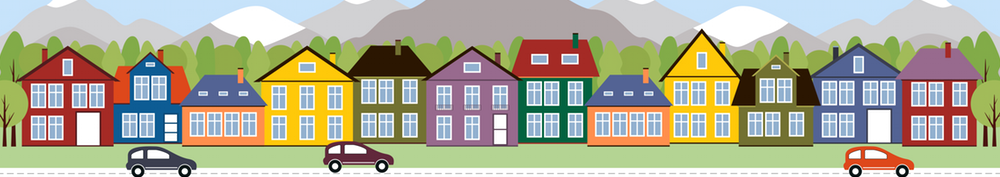

<i>**Project Goals:**</i>

**Objective:**

The primary objective of my project is to is to predict the number of boardings for public transportation.

**Importance:** 

Achieving these goals is essential for **efficient resource allocation**, **minimizing wait times for passengers**, and **reduce the crowd during peak hours** This prediction model will assist in route planning, financial forecasting, and enhancing the overall passenger experience.

**Data Availability:** 

We have access to the ridership by route dataset and a productivity matrix from the local transit authority.

**Data Types**: 

Our datasets consist of numerical variables like boarding counts and hours of operation, and categorical variables like route identifiers.

<i>**Methods:**<i>

**Analytical Approaches:** 

Our analysis incorporates statistical methods and machine learning models, including cross-validation to prevent overfitting and Random Forest for its robustness against noise.

**Implementation Plan:**

The project will follow these phases: data preprocessing, exploratory data analysis (EDA), feature selection, model building, and results interpretation.

**Challenges and Solutions:**

Potential Challenges: Challenges we faced during the project was underfitting.

**Solutions:** 

We implemented cross-validation, hyperparameter tuning, and developing a clear integration plan to achieve our objective.

# DATA PREPROCESSING

### IMPORTING THE LIBRARIES 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.stats import zscore
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### IMPORTING THE DATASET

In [2]:
productivity_matrix = pd.read_csv('VTA_Productivity_Matrix.csv')
ridership_by_route = pd.read_csv('Ridership_by_Route_Cumulative_Monthly.csv')

In [3]:
productivity_matrix.head()

,RouteNum,RouteName,Boardings,LAYOVER_HRS,PULLIN_PULLOUT_HRS,IN_SVC_HOURS,REVENUE_HOURS,SCHOOL_HOURS,TOTAL_HOURS,REV_MILES,...,BOARDINGS_REV_HR,BOARDINGS_TOTAL_HOUR,FAREBOX_RATIO,NET_COST_BOARDING,MPH,REV_HRS_TOT_HRS,RIDERSHIP_PURPOSE,linetype,DAY_TYPE,FID
0,81,Vallco — San Jose State Univ,293,4.850000,2.433333,29.383333,34.233333,0.0,36.666667,438.0,...,8.568647,8.000000,0.040079,21.147070,14.906410,0.933636,0.5,Local,Saturday,1
1,39,The Villages — Eastridge TC,196,3.233333,0.600000,7.400000,10.633333,0.0,11.233333,154.3,...,18.432602,17.448071,0.087412,9.217900,20.851351,0.946588,0.0,Community,Saturday,2
2,14,Gilroy TC — St Louise Hospital,86,1.516667,0.000000,5.383333,6.900000,0.0,6.900000,81.0,...,12.463768,12.463768,0.062441,13.257256,15.046440,1.000000,0.0,Community,Saturday,3
3,19,Gilroy TC — Wren & Mantelli,110,1.316667,3.666667,4.333333,5.650000,0.0,9.316667,65.3,...,19.469027,11.806798,0.059150,14.044064,15.069231,0.606440,0.0,Community,Saturday,4
4,32,San Antonio Shopping Ctr — Santa Clara TC,229,2.500000,1.166667,15.800000,18.300000,0.0,19.466667,250.2,...,12.495446,11.746575,0.058848,14.120592,15.835443,0.940068,0.0,Community,Saturday,5


RouteNum: The identification number of the route.

RouteName: The name or description of the route.

Boardings: The number of passengers boarding the vehicle.

LAYOVER_HRS: Hours spent on layover (time between trips).

PULLIN_PULLOUT_HRS: Hours spent pulling in and pulling out of stops.

IN_SVC_HOURS: Hours in service (excluding layover and pull-in/pull-out time).

REVENUE_HOURS: Hours during which the vehicle is generating revenue.

SCHOOL_HOURS: Hours designated for school service.

TOTAL_HOURS: Total hours the vehicle is in operation.

REV_MILES: Revenue miles traveled by the vehicle.

BOARDINGS_REV_HR: Boardings per revenue hour.

BOARDINGS_TOTAL_HOUR: Boardings per total hour.

FAREBOX_RATIO: Ratio of fare revenue to total revenue.

NET_COST_BOARDING: Net cost per boarding.

MPH: Miles per hour.

REV_HRS_TOT_HRS: Ratio of revenue hours to total hours.

RIDERSHIP_PURPOSE: Purpose of ridership (e.g., commuting, leisure).

linetype: Type of line or route.

DAY_TYPE: Type of day (e.g., weekday, weekend).

**FID**: Feature ID or unique identifier for the dataset

In [4]:
ridership_by_route.head()

,Routes,LineType,DayofWeek,Boardings,Period,Period_date,FID
0,72,Core,Weekday,2728,2005/08/01 07:00:00+00,2005/08/01 07:00:00+00,1
1,73,Core,Weekday,1920,2005/08/01 07:00:00+00,2005/08/01 07:00:00+00,2
2,76,Null,Weekday,17,2005/08/01 07:00:00+00,2005/08/01 07:00:00+00,3
3,77,Core,Weekday,1791,2005/08/01 07:00:00+00,2005/08/01 07:00:00+00,4
4,81,Local,Weekday,3012,2005/08/01 07:00:00+00,2005/08/01 07:00:00+00,5


In [5]:
print(productivity_matrix.shape)
print(ridership_by_route.shape)

(154, 27)
(45144, 7)


## DATA CLEANING

In [6]:
# Finding rows where 'Period' and 'Period_date' are not equal
unequal_periods = ridership_by_route[ridership_by_route['Period'] != ridership_by_route['Period_date']]

print(unequal_periods)

Empty DataFrame
Columns: [Routes, LineType, DayofWeek, Boardings, Period, Period_date, FID]
Index: []


This comparison is typically performed to **identify inconsistencies** or data entry errors between two date-related columns that should theoretically be equivalent or aligned

In [7]:
productivity_matrix.drop(columns=['Boardings','RouteName','FID'],inplace=True)
ridership_by_route.drop(columns = ['FID','Period'],inplace = True)

These lines of code are removing specific columns from two DataFrames: 
This is done to streamline the datasets by removing irrelevant features, duplicates, or identifiers that are not needed for analysis or modeling.

In [8]:
productivity_matrix.head()

,RouteNum,LAYOVER_HRS,PULLIN_PULLOUT_HRS,IN_SVC_HOURS,REVENUE_HOURS,SCHOOL_HOURS,TOTAL_HOURS,REV_MILES,VEHICLE_TRIPS,GROSS_COST,...,BRDGS_TRIP,BOARDINGS_REV_HR,BOARDINGS_TOTAL_HOUR,FAREBOX_RATIO,NET_COST_BOARDING,MPH,REV_HRS_TOT_HRS,RIDERSHIP_PURPOSE,linetype,DAY_TYPE
0,81,4.850000,2.433333,29.383333,34.233333,0.0,36.666667,438.0,19,6462.133333,...,15.438596,8.568647,8.000000,0.040079,21.147070,14.906410,0.933636,0.5,Local,Saturday
1,39,3.233333,0.600000,7.400000,10.633333,0.0,11.233333,154.3,22,1979.762667,...,8.909091,18.432602,17.448071,0.087412,9.217900,20.851351,0.946588,0.0,Community,Saturday
2,14,1.516667,0.000000,5.383333,6.900000,0.0,6.900000,81.0,16,1216.056000,...,5.375000,12.463768,12.463768,0.062441,13.257256,15.046440,1.000000,0.0,Community,Saturday
3,19,1.316667,3.666667,4.333333,5.650000,0.0,9.316667,65.3,21,1641.969333,...,5.238095,19.469027,11.806798,0.059150,14.044064,15.069231,0.606440,0.0,Community,Saturday
4,32,2.500000,1.166667,15.800000,18.300000,0.0,19.466667,250.2,18,3430.805333,...,12.703704,12.495446,11.746575,0.058848,14.120592,15.835443,0.940068,0.0,Community,Saturday


In [9]:
print(productivity_matrix.shape)
print(ridership_by_route.shape)

(154, 24)
(45144, 5)


In [10]:
# Merge dataframes with explicit suffixes
merged_data = pd.merge(ridership_by_route, productivity_matrix,
                       left_on=['Routes', 'DayofWeek', 'LineType'], 
                       right_on=['RouteNum', 'DAY_TYPE', 'linetype'], 
                       how='inner',
                       suffixes=('_ridership', '_productivity'))

merged_data.drop(columns=['RouteNum','DAY_TYPE', 'linetype'], inplace=True)

The code merges two dataframes, ridership_by_route and productivity_matrix, on specified columns that represent the same entities in both datasets, while adding suffixes to distinguish between similar columns from each original dataframe. **After merging, it removes redundant columns** resulting from the merge, streamlining the combined dataframe for further analysis or model input.

In [11]:
merged_data.shape

(23408, 26)

In [12]:
merged_data.columns

Index(['Routes', 'LineType', 'DayofWeek', 'Boardings', 'Period_date',
       'LAYOVER_HRS', 'PULLIN_PULLOUT_HRS', 'IN_SVC_HOURS', 'REVENUE_HOURS',
       'SCHOOL_HOURS', 'TOTAL_HOURS', 'REV_MILES', 'VEHICLE_TRIPS',
       'GROSS_COST', 'FARE_BRDG', 'FARE_REVENUE', 'OTHER_REVENUE', 'NET_COST',
       'BRDGS_TRIP', 'BOARDINGS_REV_HR', 'BOARDINGS_TOTAL_HOUR',
       'FAREBOX_RATIO', 'NET_COST_BOARDING', 'MPH', 'REV_HRS_TOT_HRS',
       'RIDERSHIP_PURPOSE'],
      dtype='object')

In [13]:
merged_data.head()

,Routes,LineType,DayofWeek,Boardings,Period_date,LAYOVER_HRS,PULLIN_PULLOUT_HRS,IN_SVC_HOURS,REVENUE_HOURS,SCHOOL_HOURS,...,OTHER_REVENUE,NET_COST,BRDGS_TRIP,BOARDINGS_REV_HR,BOARDINGS_TOTAL_HOUR,FAREBOX_RATIO,NET_COST_BOARDING,MPH,REV_HRS_TOT_HRS,RIDERSHIP_PURPOSE
0,72,Core,Weekday,2728,2005/08/01 07:00:00+00,22.0,4.0,79.0,101.0,0.0,...,0.0,16243.0,24.0,24.6,23.7,0.12,6.55,13.0,0.96,1.0
1,72,Core,Weekday,2867,2005/07/01 07:00:00+00,22.0,4.0,79.0,101.0,0.0,...,0.0,16243.0,24.0,24.6,23.7,0.12,6.55,13.0,0.96,1.0
2,72,Core,Weekday,3344,2005/09/01 07:00:00+00,22.0,4.0,79.0,101.0,0.0,...,0.0,16243.0,24.0,24.6,23.7,0.12,6.55,13.0,0.96,1.0
3,72,Core,Weekday,3166,2005/10/01 07:00:00+00,22.0,4.0,79.0,101.0,0.0,...,0.0,16243.0,24.0,24.6,23.7,0.12,6.55,13.0,0.96,1.0
4,72,Core,Weekday,3008,2005/11/01 08:00:00+00,22.0,4.0,79.0,101.0,0.0,...,0.0,16243.0,24.0,24.6,23.7,0.12,6.55,13.0,0.96,1.0


In [14]:
# Summary statistics
print("\nSummary statistics:")
merged_data.describe()


Summary statistics:


,Routes,Boardings,LAYOVER_HRS,PULLIN_PULLOUT_HRS,IN_SVC_HOURS,REVENUE_HOURS,SCHOOL_HOURS,TOTAL_HOURS,REV_MILES,VEHICLE_TRIPS,...,OTHER_REVENUE,NET_COST,BRDGS_TRIP,BOARDINGS_REV_HR,BOARDINGS_TOTAL_HOUR,FAREBOX_RATIO,NET_COST_BOARDING,MPH,REV_HRS_TOT_HRS,RIDERSHIP_PURPOSE
count,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,...,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000,23408.000000
mean,132.792208,1553.669130,11.507035,5.160823,52.528139,64.035173,0.442208,69.195996,773.615584,53.720779,...,55.759610,13946.054976,20.039984,27.058562,17.414521,0.081820,13.607462,16.106482,0.890274,0.477273
std,212.325558,2710.731602,10.985449,6.013544,61.964747,72.382239,1.750688,77.445930,897.094128,40.514371,...,374.047635,20951.218564,16.505341,103.595180,10.490300,0.060171,9.899753,5.765200,0.131313,0.420046
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.100000,2.000000,...,0.000000,9.000000,2.000000,3.809524,2.123894,0.010000,1.450000,8.000000,0.060000,0.000000
25%,35.000000,157.000000,2.800000,1.066667,9.183333,13.000000,0.000000,16.233333,156.400000,22.000000,...,0.000000,2899.000000,9.133333,12.298851,11.102552,0.054433,7.832500,13.521436,0.908252,0.000000
50%,61.000000,611.000000,8.100000,3.000000,28.125000,35.458333,0.000000,38.458333,430.200000,45.500000,...,0.000000,6622.280388,15.971014,16.524608,14.981697,0.070000,11.375000,14.917580,0.935670,0.500000
75%,89.000000,1615.000000,16.266667,7.000000,72.866667,95.000000,0.000000,102.000000,969.000000,78.000000,...,0.000000,16094.000000,24.000000,22.300000,20.800000,0.100000,15.337677,16.229186,0.956522,1.000000
max,902.000000,44304.000000,48.000000,28.100000,300.000000,343.000000,12.500000,371.000000,3834.000000,165.000000,...,3627.000000,126279.000000,106.000000,1302.900000,75.400000,0.620000,82.096737,68.000000,1.000000,1.000000


In [15]:
# Check for missing values in the entire DataFrame
missing_values = merged_data.isnull().sum()

# Display the count of missing values for each column
print("Missing values count for each column:")
print(missing_values)

Missing values count for each column:
Routes                  0
LineType                0
DayofWeek               0
Boardings               0
Period_date             0
LAYOVER_HRS             0
PULLIN_PULLOUT_HRS      0
IN_SVC_HOURS            0
REVENUE_HOURS           0
SCHOOL_HOURS            0
TOTAL_HOURS             0
REV_MILES               0
VEHICLE_TRIPS           0
GROSS_COST              0
FARE_BRDG               0
FARE_REVENUE            0
OTHER_REVENUE           0
NET_COST                0
BRDGS_TRIP              0
BOARDINGS_REV_HR        0
BOARDINGS_TOTAL_HOUR    0
FAREBOX_RATIO           0
NET_COST_BOARDING       0
MPH                     0
REV_HRS_TOT_HRS         0
RIDERSHIP_PURPOSE       0
dtype: int64


## CHECKING FOR OUTLIERS

In [16]:
# Found the maximum number in the 'Boardings' column
max_boardings = merged_data['Boardings'].max()

# Print the maximum number of boardings
print("Maximum number of boardings:", max_boardings)

Maximum number of boardings: 44304


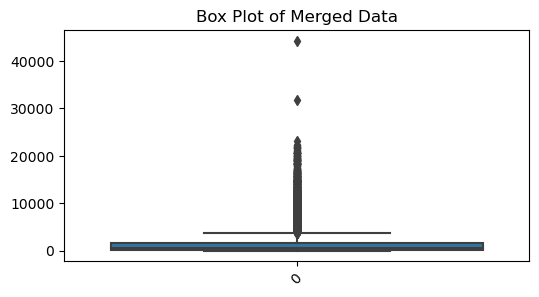

In [17]:
# Checking for outliers in Boardings
plt.figure(figsize=(6, 3))
sns.boxplot(data=merged_data['Boardings'])
plt.xticks(rotation=45)
plt.title('Box Plot of Merged Data')
plt.show()

In [18]:
# Defined a threshold for identifying outliers
threshold = 30000  

# Filtered out rows where Boardings exceed the threshold
Filtered_data = merged_data[merged_data['Boardings'] <= threshold]

print("Shape of Filtered data:", Filtered_data.shape)

Shape of Filtered data: (23406, 26)


This code sets a threshold of 30,000 for identifying outliers in the 'Boardings' column. It then filters the 'merged_data' DataFrame to include only rows where the 'Boardings' value is less than or equal to the threshold, creating a new DataFrame called 'Filtered_data'. Finally, it prints the shape of the 'Filtered_data' DataFrame.

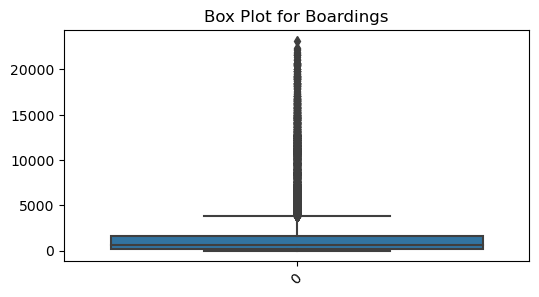

In [19]:
# visualization of boardings after removing the outliers 
plt.figure(figsize=(6, 3))
sns.boxplot(data=Filtered_data['Boardings'])
plt.xticks(rotation=45)
plt.title('Box Plot for Boardings')
plt.show()

In [20]:
# Drop 'Boardings' from the DataFrame to focus on other features
features = merged_data.drop(columns=['Boardings'])

# Select only the numeric columns
numeric_features = features.select_dtypes(include=['float64', 'int64'])

# Calculate z-scores for each numeric feature
z_scores = pd.DataFrame(zscore(numeric_features), columns=numeric_features.columns)

# Calculate the mean absolute z-score for each feature
mean_abs_z_scores = z_scores.abs().mean()

# Get the top 3 features with the highest mean absolute z-scores
top_3_features = mean_abs_z_scores.nlargest(3)

print("Top 3 features for outlier detection:")
print(top_3_features)

Top 3 features for outlier detection:
RIDERSHIP_PURPOSE    0.912804
VEHICLE_TRIPS        0.808552
LAYOVER_HRS          0.785836
dtype: float64


**The mean absolute z-score?**
The mean absolute z-score provides a measure of the typical distance of data points from the mean, relative to the variability of the data (standard deviation). It helps in understanding how spread out the data points are from the mean in terms of standard deviations. A higher mean absolute **z-score indicates greater variability or dispersion of data points from the mean.**

This code performs outlier detection using z-scores on numeric features in a DataFrame. It first drops the 'Boardings' column to focus on other features. Then, it calculates z-scores for each numeric feature and determines the mean absolute z-score for each feature. Finally, it selects the top 3 features with the **highest mean absolute z-scores, which are likely to have outliers.**

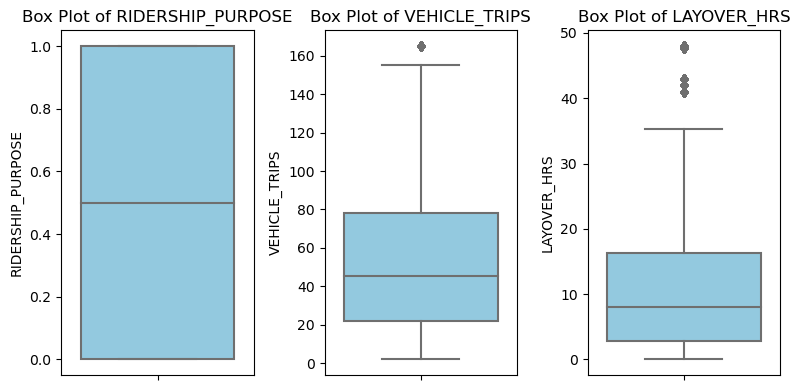

In [21]:
# Define the top 3 features
top_3_features = ['RIDERSHIP_PURPOSE', 'VEHICLE_TRIPS', 'LAYOVER_HRS']

# Create box plots for each feature
plt.figure(figsize=(8, 4))
for i, feature in enumerate(top_3_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=feature, data=merged_data, color='skyblue')
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

This code creates a figure with three subplots, each showing a box plot for one of the top 3 features ('RIDERSHIP_PURPOSE', 'VEHICLE_TRIPS', 'LAYOVER_HRS') in the merged_data DataFrame. Box plots are used to visualize the distribution and identify potential outliers in each feature.

**Box Plot of RIDERSHIP_PURPOSE:** This plot seems to show a distribution that is fairly uniform, as indicated by the box being almost fully extended, suggesting that the variable might be categorical or binary (possibly 0 or 1). If it is a binary variable, the plot indicates that almost all values are 1, with very few 0s, as there is no whisker or outliers on the lower end.

**Box Plot of VEHICLE_TRIPS:** This variable has a range of values with the median around 80 vehicle trips. The spread of the data, indicated by the box, shows the middle 50% of the data. The whiskers extend to include most of the data, but there is one outlier, which is significantly higher than the rest, marked by the diamond shape.

**Box Plot of LAYOVER_HRS:** The median layover hours are around 15 hours, with the middle 50% of the data ranging approximately from 10 to 25 hours. The upper whisker extends to just above 40 hours, beyond which there are a few outliers indicated by the individual points. These outliers are the layover hours that are unusually high compared to the rest of the data.

In [22]:
# Filter the DataFrame to include only rows with 'LAYOVER_HRS' between 40 and 50
layovers_40_to_50 = merged_data[(merged_data['LAYOVER_HRS'] >= 40) & (merged_data['LAYOVER_HRS'] <= 50)]

# Count the number of instances within this range
count_layovers_40_to_50 = layovers_40_to_50.shape[0]

print("Number of layovers between 40 and 50:", count_layovers_40_to_50)

Number of layovers between 40 and 50: 912


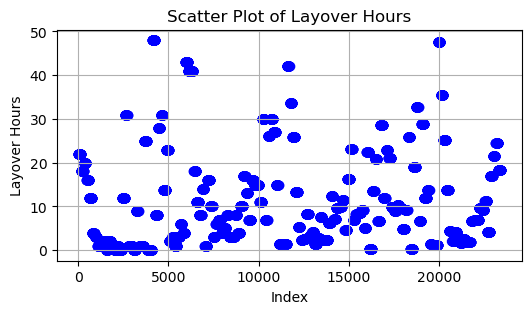

In [23]:
# Scatter plot for 'LAYOVER_HRS'
plt.figure(figsize=(6, 3))
plt.scatter(range(len(merged_data)), merged_data['LAYOVER_HRS'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Layover Hours')
plt.xlabel('Index')
plt.ylabel('Layover Hours')
plt.grid(True)
plt.show()

In the scatter plot of layover hours, it seems there aren't clear outliers, as the data points are quite spread out. However, there are a few instances with particularly high layover hours (close to 50 hours) that stand out from the rest.

## FEATURE ENCODING

In [24]:
# Perform one-hot encoding for categorical columns
Filtered_data_encoded = pd.get_dummies(Filtered_data, columns=['LineType', 'DayofWeek'])
Filtered_data_encoded.head()

,Routes,Boardings,Period_date,LAYOVER_HRS,PULLIN_PULLOUT_HRS,IN_SVC_HOURS,REVENUE_HOURS,SCHOOL_HOURS,TOTAL_HOURS,REV_MILES,...,LineType_Community,LineType_Core,LineType_Express,LineType_LRT,LineType_Limited,LineType_Local,LineType_Other,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Weekday
0,72,2728,2005/08/01 07:00:00+00,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1
1,72,2867,2005/07/01 07:00:00+00,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1
2,72,3344,2005/09/01 07:00:00+00,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1
3,72,3166,2005/10/01 07:00:00+00,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1
4,72,3008,2005/11/01 08:00:00+00,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1


LineType_Community: Community lines, possibly serving specific communities or neighborhoods.
LineType_Core: Core lines, likely representing primary or central routes.
LineType_Express: Express lines, which typically have fewer stops and faster service.
LineType_LRT: Light rail transit lines, indicating light rail routes.
LineType_Limited: Limited lines, which may have limited stops or operate during specific times.
LineType_Local: Local lines, suggesting routes that primarily serve local areas.
LineType_Other: Other types of lines that do not fit into the above categories.

One-hot encoding is a process that converts categorical variables into a form that could be provided to ML algorithms to do a better job in prediction. The pd.get_dummies function is used here to transform the 'LineType' and 'DayofWeek' columns into one-hot encoded vectors. This results in a new dataframe, Filtered_data_encoded, where each unique category in the specified columns becomes a new binary column (1 or 0),representing the presence or absence of that category in each row.

In [25]:
# Assuming filtered_data_encoded is your DataFrame and 'Period_date' is the column to convert
Filtered_data_encoded['Period_date'] = pd.to_datetime(Filtered_data_encoded['Period_date']).dt.date

pd.to_datetime(Filtered_data_encoded['Period_date']): This function converts the 'Period_date' column to datetime objects, which include both date and time information.
.dt.date: The .dt accessor is used to access the date properties of the datetime objects, and .date is used to get just the date part, excluding any time information.
Filtered_data_encoded['Period_date'] = ...: Finally, the original 'Period_date' column in the DataFrame is overwritten with these date-only values.

In [26]:
Filtered_data_encoded.head()

,Routes,Boardings,Period_date,LAYOVER_HRS,PULLIN_PULLOUT_HRS,IN_SVC_HOURS,REVENUE_HOURS,SCHOOL_HOURS,TOTAL_HOURS,REV_MILES,...,LineType_Community,LineType_Core,LineType_Express,LineType_LRT,LineType_Limited,LineType_Local,LineType_Other,DayofWeek_Saturday,DayofWeek_Sunday,DayofWeek_Weekday
0,72,2728,2005-08-01,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1
1,72,2867,2005-07-01,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1
2,72,3344,2005-09-01,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1
3,72,3166,2005-10-01,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1
4,72,3008,2005-11-01,22.0,4.0,79.0,101.0,0.0,105.0,1041.0,...,0,1,0,0,0,0,0,0,0,1


## EXPLORATORY DATA ANALYSIS 

In [27]:
Correlation = Filtered_data_encoded.corr(numeric_only=True)['Boardings'].abs().sort_values(ascending=False)
Correlation

Boardings               1.000000
FARE_REVENUE            0.857595
IN_SVC_HOURS            0.820455
TOTAL_HOURS             0.815860
REVENUE_HOURS           0.815081
BRDGS_TRIP              0.793231
REV_MILES               0.782376
GROSS_COST              0.755530
LAYOVER_HRS             0.742626
NET_COST                0.740562
PULLIN_PULLOUT_HRS      0.696375
VEHICLE_TRIPS           0.686724
RIDERSHIP_PURPOSE       0.521263
BOARDINGS_TOTAL_HOUR    0.471473
LineType_Core           0.378615
LineType_LRT            0.282270
NET_COST_BOARDING       0.274734
LineType_Community      0.243237
Routes                  0.236744
LineType_Local          0.191717
FAREBOX_RATIO           0.181196
REV_HRS_TOT_HRS         0.180461
MPH                     0.159877
LineType_Express        0.141585
LineType_Limited        0.087759
LineType_Other          0.080938
DayofWeek_Weekday       0.060028
DayofWeek_Sunday        0.054909
OTHER_REVENUE           0.033986
FARE_BRDG               0.022338
DayofWeek_

This code calculates the absolute correlation coefficients between the 'Boardings' column and all other numeric columns in the `Filtered_data_encoded` DataFrame. The coefficients are sorted in descending order, showing the strength of linear relationships between 'Boardings' and other features.


In [28]:
Correlation.shape

(33,)

In [29]:
# Defined a threshold for selecting features
Correlation_threshold = 0.1  

# Selected features with correlation values above the threshold
Selected_features = Correlation[Correlation > Correlation_threshold].index.tolist()
print("Selected Features:", Selected_features)

Selected Features: ['Boardings', 'FARE_REVENUE', 'IN_SVC_HOURS', 'TOTAL_HOURS', 'REVENUE_HOURS', 'BRDGS_TRIP', 'REV_MILES', 'GROSS_COST', 'LAYOVER_HRS', 'NET_COST', 'PULLIN_PULLOUT_HRS', 'VEHICLE_TRIPS', 'RIDERSHIP_PURPOSE', 'BOARDINGS_TOTAL_HOUR', 'LineType_Core', 'LineType_LRT', 'NET_COST_BOARDING', 'LineType_Community', 'Routes', 'LineType_Local', 'FAREBOX_RATIO', 'REV_HRS_TOT_HRS', 'MPH', 'LineType_Express']


This code sets a threshold of 0.1 for correlation values. It then selects features from the 'Correlation' Series that have correlation values above this threshold and converts them to a list, which are then printed as the selected features.

In [30]:
Selected_features_df = Filtered_data_encoded[Selected_features]
Selected_features_df.head()

,Boardings,FARE_REVENUE,IN_SVC_HOURS,TOTAL_HOURS,REVENUE_HOURS,BRDGS_TRIP,REV_MILES,GROSS_COST,LAYOVER_HRS,NET_COST,...,LineType_Core,LineType_LRT,NET_COST_BOARDING,LineType_Community,Routes,LineType_Local,FAREBOX_RATIO,REV_HRS_TOT_HRS,MPH,LineType_Express
0,2728,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
1,2867,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
2,3344,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
3,3166,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
4,3008,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0


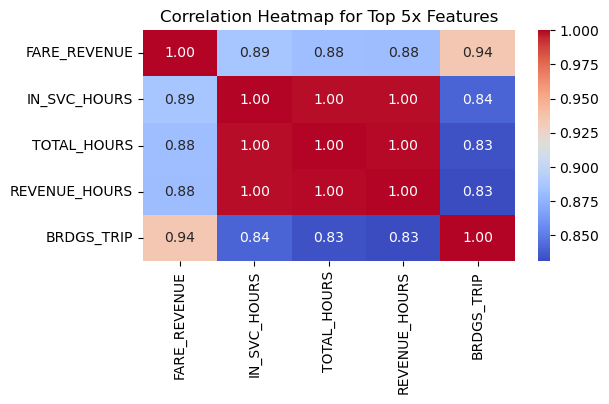

In [31]:
top_5_features = Correlation.index[1:6] 

# Create a new DataFrame containing only the top 5 features
top_5_data = Filtered_data_encoded[top_5_features]

# Calculate the correlation matrix for the top 5 features
correlation_top_5 = top_5_data.corr()

# Create a heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_top_5, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap for Top 5x Features')
plt.show()

We ran a heat map for finding the correlation between the features.

This code calculates the correlation matrix for all features in the dataset. It then identifies the feature pairs with the highest correlation (excluding self-correlation) and selects the top 5 features based on this criteria.

All features are positively correlated with each other, with coefficients ranging from 0.83 to 0.94, indicating strong relationships.

Darker red squares indicate stronger positive correlations.

The diagonal from top left to bottom right shows a perfect correlation of 1.00, as every feature perfectly correlates with itself.


The strongest non-self correlation is between FARE_REVENUE and BRDGS_TRIP (0.94), suggesting a very strong positive relationship where as one increases, so does the other


## VISUALIZATIONS FOR EXPLORATORY DATA ANALYSIS 

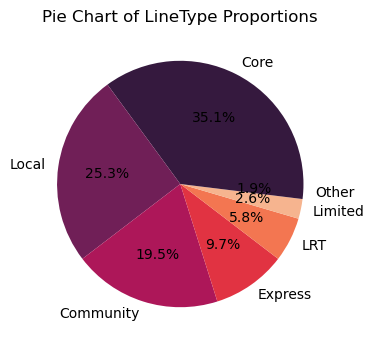

In [32]:
# Pie chart for line type 
plt.figure(figsize=(4, 4))
merged_data['LineType'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('rocket'))
plt.title('Pie Chart of LineType Proportions')
plt.ylabel('')
plt.show()

 The distribution of LineTypes could be an important factor in predicting boardings. For example, certain LineTypes (e.g., express routes) might have higher ridership compared to others, impacting overall boardings. 
 this might influence the importance of other features like frequency or distance.
 
 Core: This is the largest slice, taking up 35.1% of the pie, indicating that Core lines constitute the majority of the transit system.
Local: The second largest category at 25.3%, suggesting a significant number of Local lines.
Community: Represented by a 19.5% slice, indicating that nearly one-fifth of the lines are classified as Community.
Express: Smaller than the previous categories at 9.7%, these are likely faster lines with fewer stops.
LRT (Light Rail Transit): At 5.8%, this suggests a smaller portion of the system is made up of light rail lines.
Other Limited: The smallest visible slice at 1.9%, indicating a very small number of lines fall into this category.
Unlabeled Slice: There appears to be another small slice next to 'Other Limited' without a label. Its size looks comparable to the 'Other Limited' category, but since it's unlabeled, we cannot determine what line type it represents.


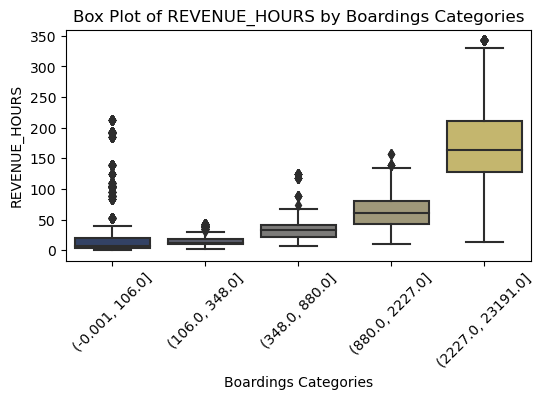

In [33]:
# Box Plot for revenue hours by boardings categories 
plt.figure(figsize=(6, 3))
sns.boxplot(x=pd.qcut(Filtered_data_encoded['Boardings'], q=5), y='REVENUE_HOURS', data=Filtered_data_encoded, palette='cividis')
plt.xlabel('Boardings Categories')
plt.ylabel('REVENUE_HOURS')
plt.title('Box Plot of REVENUE_HOURS by Boardings Categories')
plt.xticks(rotation=45)
plt.show()

The plot shows that lower boarding categories generally have lower revenue hours, with the median values close to the bottom of the range and not many outliers. The higher boarding categories have higher revenue hours, with more variability and more extreme outliers, especially in the highest boarding category.

The "whiskers" (the lines extending vertically from the boxes) represent the variability outside the upper and lower quartiles, and points outside the whiskers are considered outliers. These are data points that fall far from the central range.




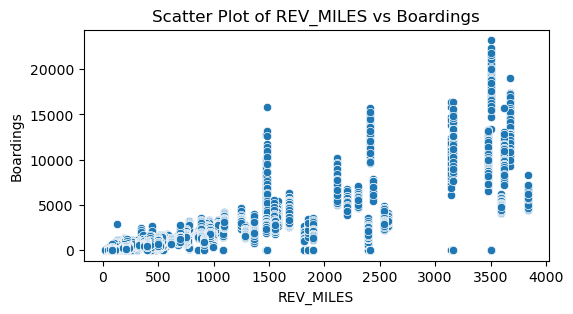

In [34]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='REV_MILES', y='Boardings', data=Filtered_data_encoded)
plt.xlabel('REV_MILES')
plt.ylabel('Boardings')
plt.title('Scatter Plot of REV_MILES vs Boardings')
plt.show()

The plot shows a spread of points that may suggest a pattern or trend between the miles traveled and the number of boardings.

Some routes (vertical clusters) have a wide range of boarding numbers, while others have more consistent boardings regardless of the miles traveled. 

As the revenue miles increase, there are distinct clusters of boardings that could indicate different service routes or times with varying passenger counts. There's no clear linear relationship; instead, the data show a more complex pattern that might require further analysis to understand the underlying factors affecting boardings.

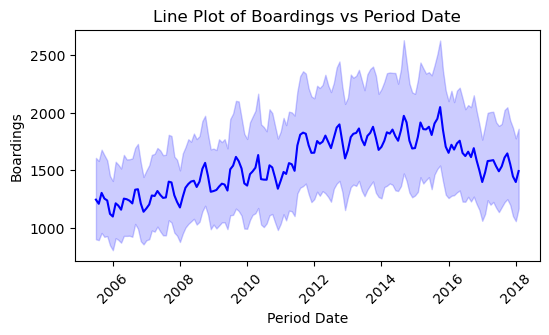

In [35]:
plt.figure(figsize=(6, 3))
sns.lineplot(x='Period_date', y='Boardings', data=Filtered_data_encoded, color='blue')
plt.xlabel('Period Date')
plt.ylabel('Boardings')
plt.title('Line Plot of Boardings vs Period Date')
plt.xticks(rotation=45)
plt.show()

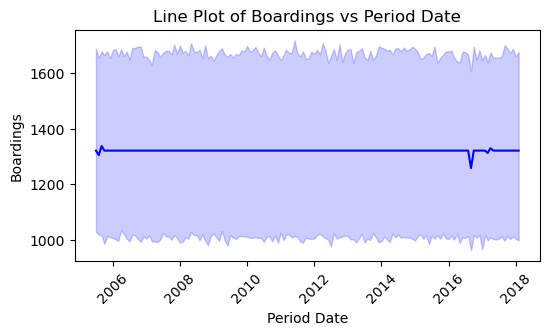

In [36]:
plt.figure(figsize=(6, 3))
sns.lineplot(x='Period_date', y='FARE_REVENUE', data=Filtered_data_encoded, color='blue')
plt.xlabel('Period Date')
plt.ylabel('Boardings')
plt.title('Line Plot of Boardings vs Period Date')
plt.xticks(rotation=45)
plt.show()


There's an overall increase in boardings over time, with some years showing higher variability. Peaks and troughs could correspond to specific events or seasonal patterns within each year.

The line represents the central trend of boardings over time, indicating fluctuation and possible seasonality or other cyclical patterns.

The shaded area might represent the variability around the trend, possibly showing confidence intervals or standard deviations, suggesting how certain we are about the trend line.


In [37]:
 # Selecting all features except 'Boardings' for X
X = Selected_features_df.drop(columns=['Boardings'])
# Concatenating 'Period_date' column with X
X['Period_date'] = Filtered_data_encoded['Period_date']
# Set 'Period_date' as the index column in DataFrame X
X.set_index('Period_date', inplace=True)
# Selecting 'Boardings' as y
y = Selected_features_df['Boardings']

This code prepares the feature matrix `X` and the target vector `y` for further analysis. It selects all features except 'Boardings' from the DataFrame `Selected_features_df` and assigns it to `X`. It then concatenates the 'Period_date' column from `Filtered_data_encoded` to `X`. Finally, it sets 'Period_date' as the index column in `X` and selects 'Boardings' as `y`.

In [38]:
X.head()

,FARE_REVENUE,IN_SVC_HOURS,TOTAL_HOURS,REVENUE_HOURS,BRDGS_TRIP,REV_MILES,GROSS_COST,LAYOVER_HRS,NET_COST,PULLIN_PULLOUT_HRS,...,LineType_Core,LineType_LRT,NET_COST_BOARDING,LineType_Community,Routes,LineType_Local,FAREBOX_RATIO,REV_HRS_TOT_HRS,MPH,LineType_Express
Period_date,,,,,,,,,,,,,,,,,,,,,
2005-08-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
2005-07-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
2005-09-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
2005-10-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
2005-11-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0


In [39]:
X.columns

Index(['FARE_REVENUE', 'IN_SVC_HOURS', 'TOTAL_HOURS', 'REVENUE_HOURS',
       'BRDGS_TRIP', 'REV_MILES', 'GROSS_COST', 'LAYOVER_HRS', 'NET_COST',
       'PULLIN_PULLOUT_HRS', 'VEHICLE_TRIPS', 'RIDERSHIP_PURPOSE',
       'BOARDINGS_TOTAL_HOUR', 'LineType_Core', 'LineType_LRT',
       'NET_COST_BOARDING', 'LineType_Community', 'Routes', 'LineType_Local',
       'FAREBOX_RATIO', 'REV_HRS_TOT_HRS', 'MPH', 'LineType_Express'],
      dtype='object')

In [40]:
print(X.shape)
print(y.shape)

(23406, 23)
(23406,)


## SPLITING THE TRAINING AND TESTING TEST 

In [41]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (18724, 23)
Shape of X_test: (4682, 23)
Shape of y_train: (18724,)
Shape of y_test: (4682,)


This code splits the data into training and testing sets using the `train_test_split` function from scikit-learn. It uses a test size of 0.2, meaning 20% of the data will be used for testing, and sets the random state for reproducibility. Finally, it prints the shapes of the training and testing sets to confirm the split.

## FEATURE SCALING 

In [42]:
# Features that might require scaling
features_to_scale = ['FARE_REVENUE','BRDGS_TRIP', 'REV_MILES', 'GROSS_COST','NET_COST','TOTAL_HOURS']

# Initialize StandardScaler
scaler = StandardScaler()

X_scaled = X.copy()  # Create a copy to avoid changing the original DataFrame

# Scale only the specified features
X_train_scaled = scaler.fit_transform(X_train[features_to_scale])

# Display the first few rows of the scaled features
X_scaled.head()

,FARE_REVENUE,IN_SVC_HOURS,TOTAL_HOURS,REVENUE_HOURS,BRDGS_TRIP,REV_MILES,GROSS_COST,LAYOVER_HRS,NET_COST,PULLIN_PULLOUT_HRS,...,LineType_Core,LineType_LRT,NET_COST_BOARDING,LineType_Community,Routes,LineType_Local,FAREBOX_RATIO,REV_HRS_TOT_HRS,MPH,LineType_Express
Period_date,,,,,,,,,,,,,,,,,,,,,
2005-08-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
2005-07-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
2005-09-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
2005-10-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0
2005-11-01,2188.0,79.0,105.0,101.0,24.0,1041.0,18432.0,22.0,16243.0,4.0,...,1,0,6.55,0,72,0,0.12,0.96,13.0,0


"FARE_REVENUE" could be in dollars, "REV_MILES" in miles, and "TOTAL_HOURS" in hours. Scaling these features ensures that they are on a similar scale, preventing features with larger magnitudes from dominating the model's learning process.

## MACHINE LEARNING MODEL 

## LINEAR REGRESSION MODEL 

In [43]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_train)

# Predictions on the testing set
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R^2:", train_r2)
print("Test R^2:", test_r2)

Train RMSE: 1233.6716990891325
Test RMSE: 1287.0044967267195
Train R^2: 0.7880921059246057
Test R^2: 0.7770248800631379


## LOGISTIC REGRESSION MODEL 

## TIME SERIES ANALYSIS 

In [44]:
# Extract 'Period_date' and 'Boardings' columns
Time_Series = pd.DataFrame({
    'Date': Filtered_data_encoded['Period_date'],
    'Boardings_with_Date': Filtered_data_encoded['Boardings'],
    'FR': Filtered_data_encoded['FARE_REVENUE']
})

# Display the new DataFrame
print(Time_Series)

             Date  Boardings_with_Date          FR
0      2005-08-01                 2728  2188.00000
1      2005-07-01                 2867  2188.00000
2      2005-09-01                 3344  2188.00000
3      2005-10-01                 3166  2188.00000
4      2005-11-01                 3008  2188.00000
...           ...                  ...         ...
23403  2017-10-01                 2579  2040.45123
23404  2017-11-01                 2246  2040.45123
23405  2018-01-01                 2232  2040.45123
23406  2017-12-01                 2108  2040.45123
23407  2018-02-01                 2375  2040.45123

[23406 rows x 3 columns]


In [45]:
# Convert 'Period_date' to datetime
Time_Series['Date'] = pd.to_datetime(Time_Series['Date'])

# Extract year from 'Period_date'
Time_Series['Year'] = Time_Series['Date'].dt.year

# Aggregate boardings year-wise
boardings_yearly = Time_Series.groupby('Year')['Boardings_with_Date'].sum().reset_index()
boardings_yearly1 = Time_Series.groupby('Year')['FR'].sum().reset_index()
# Display the aggregated data
print(boardings_yearly)
print(boardings_yearly1)

    Year  Boardings_with_Date
0   2005              1134189
1   2006              2251770
2   2007              2364232
3   2008              2552240
4   2009              2652430
5   2010              2705415
6   2011              3002063
7   2012              3235028
8   2013              3294811
9   2014              3338408
10  2015              3423887
11  2016              3054037
12  2017              2838804
13  2018               444953
    Year            FR
0   2005  1.220955e+06
1   2006  2.441911e+06
2   2007  2.441911e+06
3   2008  2.441911e+06
4   2009  2.441911e+06
5   2010  2.441911e+06
6   2011  2.441911e+06
7   2012  2.441911e+06
8   2013  2.441911e+06
9   2014  2.441911e+06
10  2015  2.441911e+06
11  2016  2.429742e+06
12  2017  2.441911e+06
13  2018  4.069852e+05


In [46]:
# Assuming you have the fare revenue data in a DataFrame named 'merged_data'

# Find the fare revenue for 2015
fare_2017 = boardings_yearly1.loc[boardings_yearly['Year'] == 2017, 'FR'].values[0]

# Find the fare revenue for 2016
fare_2018 = boardings_yearly1.loc[boardings_yearly['Year'] == 2018, 'FR'].values[0]

# Calculate the difference
difference = fare_2017 - fare_2018

print("Difference in fare revenue between 2015 and 2016:", difference)


Difference in fare revenue between 2015 and 2016: 2034925.8054999998


In [47]:
# Filter the dataset to include only the rows for the year 2018
data_2018 = Time_Series[Time_Series['Date'].dt.year == 2018]

# Display the data for the year 2018
print(data_2018)

            Date  Boardings_with_Date          FR  Year
150   2018-01-01                 2298  2188.00000  2018
151   2018-02-01                 2785  2188.00000  2018
302   2018-01-01                 2373  2156.00000  2018
303   2018-02-01                 2794  2156.00000  2018
454   2018-01-01                 1840  1852.00000  2018
...          ...                  ...         ...   ...
23103 2018-02-01                 2745  2251.17719  2018
23253 2018-01-01                 2737  2415.99079  2018
23255 2018-02-01                 2893  2415.99079  2018
23405 2018-01-01                 2232  2040.45123  2018
23407 2018-02-01                 2375  2040.45123  2018

[308 rows x 4 columns]


In [48]:
# Drop rows where the year is 2018
Time_Series = Time_Series[Time_Series['Date'].dt.year != 2018]
Time_Series

,Date,Boardings_with_Date,FR,Year
0,2005-08-01,2728,2188.00000,2005
1,2005-07-01,2867,2188.00000,2005
2,2005-09-01,3344,2188.00000,2005
3,2005-10-01,3166,2188.00000,2005
4,2005-11-01,3008,2188.00000,2005
...,...,...,...,...
23401,2017-08-01,2569,2040.45123,2017
23402,2017-09-01,2569,2040.45123,2017
23403,2017-10-01,2579,2040.45123,2017
23404,2017-11-01,2246,2040.45123,2017


In [49]:
# Convert 'Period_date' to datetime
Time_Series['Date'] = pd.to_datetime(Time_Series['Date'])

# Extract year from 'Period_date'
Time_Series['Year'] = Time_Series['Date'].dt.year

# Aggregate boardings year-wise
boardings_yearly = Time_Series.groupby('Year')['Boardings_with_Date'].sum().reset_index()

# Display the aggregated data
print(boardings_yearly)

    Year  Boardings_with_Date
0   2005              1134189
1   2006              2251770
2   2007              2364232
3   2008              2552240
4   2009              2652430
5   2010              2705415
6   2011              3002063
7   2012              3235028
8   2013              3294811
9   2014              3338408
10  2015              3423887
11  2016              3054037
12  2017              2838804


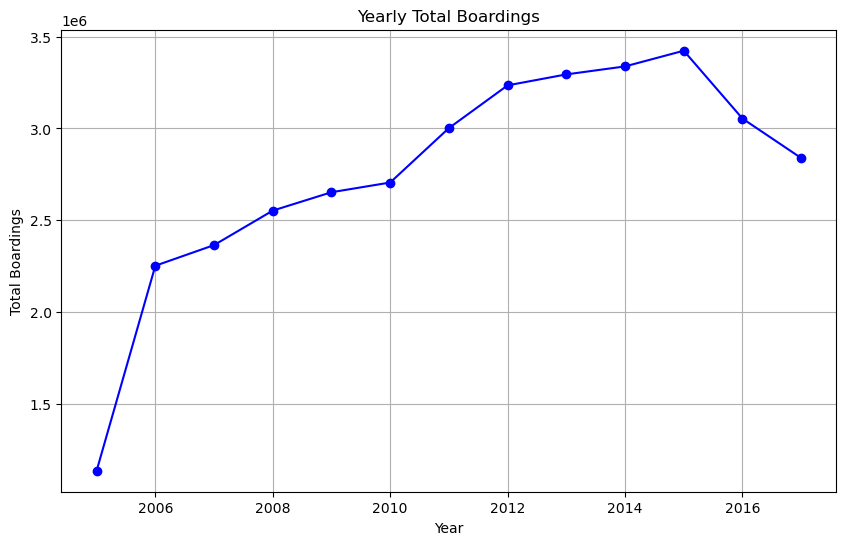

In [50]:
import matplotlib.pyplot as plt

# Plot aggregated yearly boardings
plt.figure(figsize=(10, 6))
plt.plot(boardings_yearly['Year'], boardings_yearly['Boardings_with_Date'], marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Total Boardings')
plt.title('Yearly Total Boardings')
plt.grid(True)
plt.show()

### DECOMPOSITION METHOD 

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Extracting the time series data
boardings_data = Time_Series['Boardings_with_Date']

# Perform seasonal decomposition
decomposition = seasonal_decompose(boardings_data, model='additive', period=720)


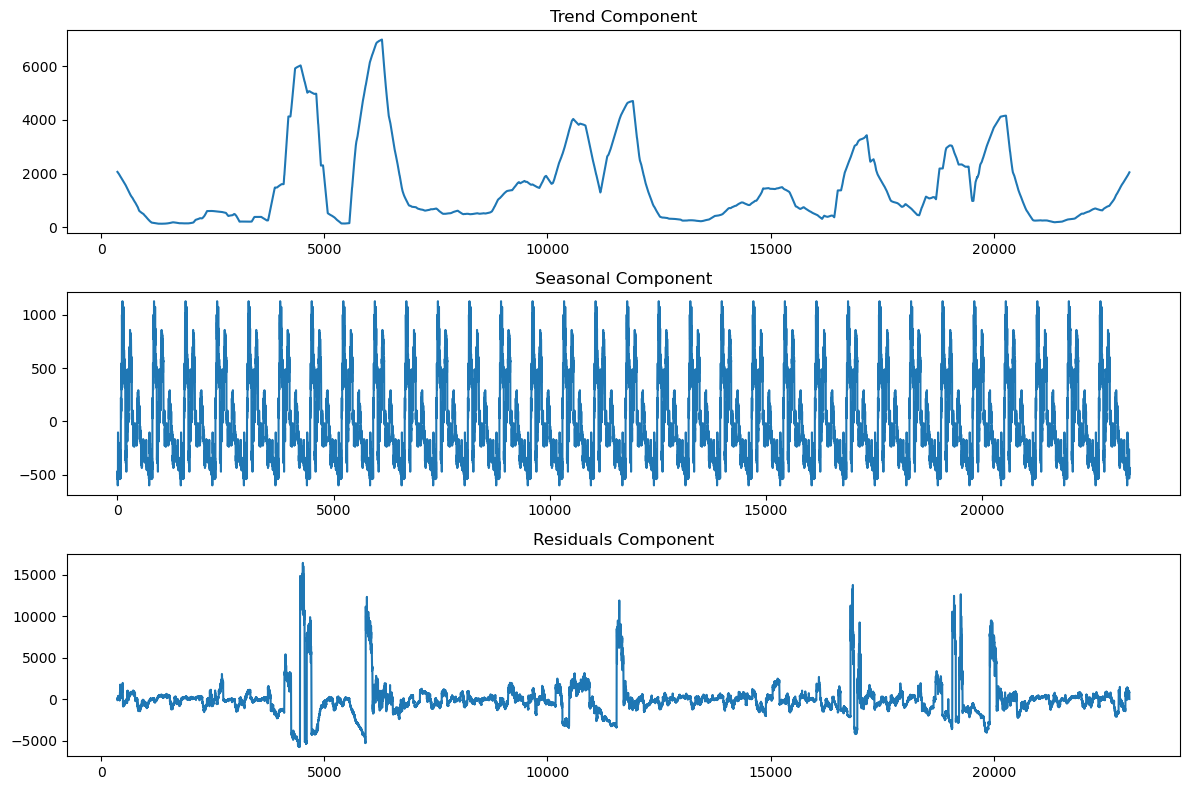

In [52]:
# Analyze the Components
trend = decomposition.trend
seasonal = decomposition.seasonal
residuals = decomposition.resid

# Plot the Components
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.plot(trend)
plt.title('Trend Component')

plt.subplot(312)
plt.plot(seasonal)
plt.title('Seasonal Component')

plt.subplot(313)
plt.plot(residuals)
plt.title('Residuals Component')

plt.tight_layout()
plt.show()

**Strong Seasonality:** Clear recurring peaks and troughs in boarding numbers suggest consistent seasonal patterns, possibly influenced by holidays or specific times of the year.

**No Significant Long-term Trend:** Flat trend component indicates stable boarding activity levels over time, with no notable upward or downward trends.

**Presence of Noise/Residuals:** Random fluctuations in data suggest unexplained variability beyond seasonal and trend patterns.

**Periodicity of Peaks:** Regular intervals between peaks imply predictable spikes in travel demand, likely tied to specific events or times of the year.

### FINDING IF THERE ARE ANAMOLIES(OUTLIERS)

In [53]:
residuals[residuals.notnull()]

364      -13.543634
365     -109.490792
366       36.816413
367      148.462550
368      205.039677
            ...    
23037    836.693518
23038    826.700571
23039    550.912616
23040    691.157147
23041     40.576721
Name: resid, Length: 22378, dtype: float64

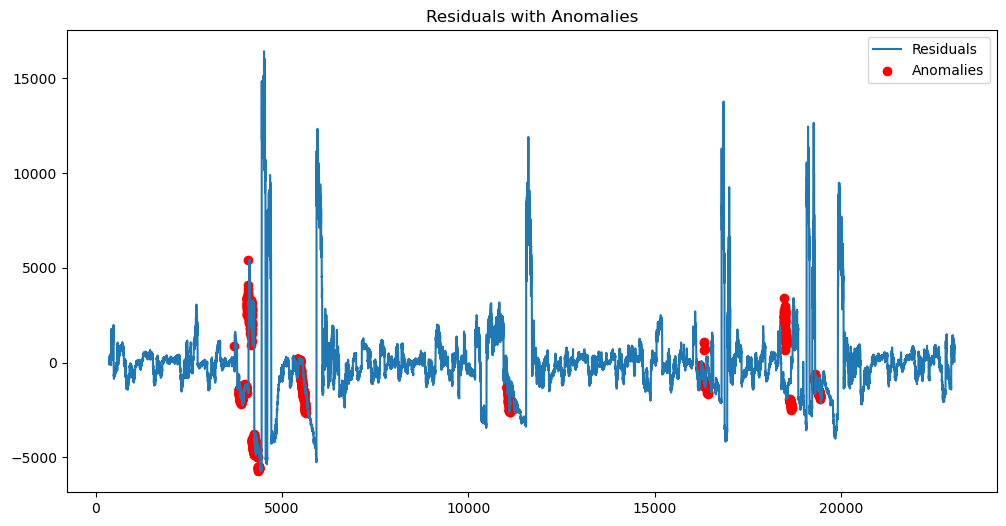

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Calculate Z-score for residuals
residuals_zscore = zscore(residuals[residuals.notnull()])

# Define threshold for anomaly detection
threshold = 2  # Adjust as needed based on your data and requirements

# Find anomalies (values beyond threshold)
anomalies_indices = np.where(np.abs(residuals_zscore) > threshold)[0]
anomalies_indices = anomalies_indices[anomalies_indices < len(residuals)]  # Ensure indices are within range
anomalies_values = residuals.iloc[anomalies_indices]  # Access values only for existing indices

# Plot the Residuals with Anomalies
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.scatter(anomalies_indices, anomalies_values, color='red', label='Anomalies')
plt.title('Residuals with Anomalies')
plt.legend()
plt.show()


In [55]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-score for the data
z_scores = zscore(residuals[residuals.notnull()])

# Define threshold for anomaly detection
threshold = 3  # Adjust as needed based on your data and requirements

# Find anomalies (values beyond threshold)
anomalies_indices = np.where(np.abs(z_scores) > threshold)[0]
num_anomalies = len(anomalies_indices)

print("Number of anomalies:", num_anomalies)

Number of anomalies: 667


In [56]:
# Remove anomalies from the residuals
clean_residuals = residuals.drop(anomalies_indices, errors='ignore')  # Ignore errors when dropping missing indices

# Recalculate the Z-scores for the cleaned residuals
clean_z_scores = zscore(clean_residuals)

# Find indices of anomalies in the cleaned residuals
clean_anomalies_indices = np.where(np.abs(clean_z_scores) > threshold)[0]

# Calculate the number of remaining anomalies
num_remaining_anomalies = len(clean_anomalies_indices)

print("Number of remaining anomalies after removing:", num_remaining_anomalies)


Number of remaining anomalies after removing: 0


In [57]:
clean_residuals

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
23401   NaN
23402   NaN
23403   NaN
23404   NaN
23406   NaN
Name: resid, Length: 22442, dtype: float64

## TESTING THE STATIONARY

In [58]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_stat, p_value, _, _, _, _ = adfuller(y)

# Interpret the results
print("ADF Statistic:", adf_stat)
print("p-value:", p_value)

if p_value > 0.05:
    print("Fail to reject the null hypothesis (series may be non-stationary)")
else:
    print("Reject the null hypothesis (series is Stationary)")


ADF Statistic: -10.279614192583322
p-value: 3.809959588128083e-18
Reject the null hypothesis (series is Stationary)


## ACF AND PACF 

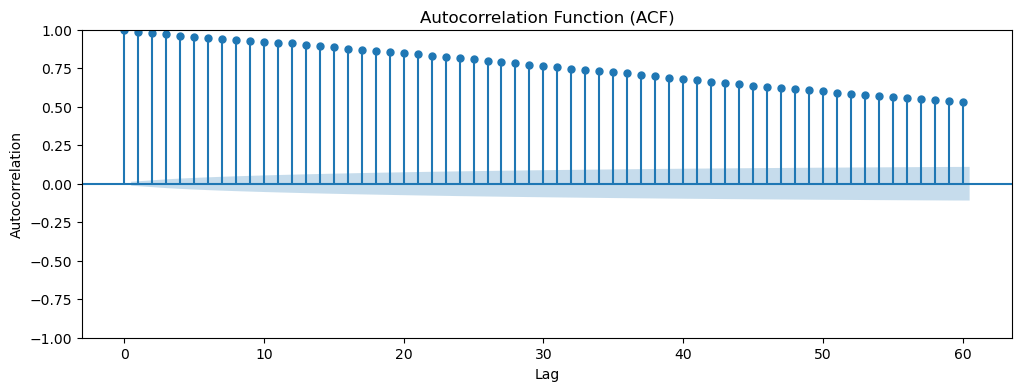

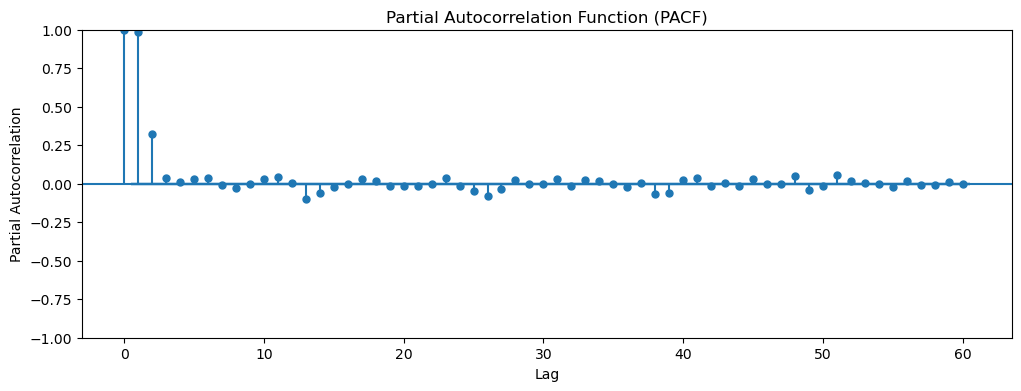

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Replace 'ts' with your actual time series data
ts = Time_Series['Boardings_with_Date']

# Plot ACF as a bar graph
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(ts, lags=60, ax=ax)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF as a bar graph
fig, ax = plt.subplots(figsize=(12, 4))
plot_pacf(ts, lags=60, ax=ax)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.show()


**ACF plot**:
The ACF values show a gradual, slow decay as the lag increases.
This suggests the presence of a persistent, **non-seasonal autocorrelation structure** in the data.
The slow decay in the ACF indicates the current value is related to past values even at higher lags.

**PACF plot:**
The PACF values decline more rapidly, with the first few lags showing the highest partial autocorrelation.
This pattern in the PACF suggests the time series may have an autoregressive (AR) component with a relatively low order.

## TRAIN TEST SPLIT 

In [60]:
# Assuming you have already calculated clean_residuals and anomalies_indices

# Remove anomalies from the original DataFrame
clean_data = Time_Series.drop(anomalies_indices, errors='ignore')

# Split the clean data into training and testing sets
split_index = int(len(clean_data) * 0.8)  # Adjust the split ratio as needed
train_set = clean_data.iloc[:split_index]
test_set = clean_data.iloc[split_index:]

# Display the number of rows in each set
print("Number of rows in training set:", len(train_set))
print("Number of rows in testing set:", len(test_set))

Number of rows in training set: 17953
Number of rows in testing set: 4489


## FIT THE MODEL 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

## ARIMA MODEL
Autoregressive Integrated Moving Average (SARIMA) 

In [62]:
# Fit ARIMA model
p = 1 # AR order
d = 0  # Differencing order
q = 1  # MA order
model = ARIMA(train_set['Boardings_with_Date'], order=(p, d, q))
arima_result = model.fit()

# Print model summary
print(arima_result.summary())


/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     Boardings_with_Date   No. Observations:                17953
Model:                  ARIMA(1, 0, 1)   Log Likelihood             -135637.538
Date:                 Thu, 18 Apr 2024   AIC                         271283.075
Time:                         02:17:02   BIC                         271314.257
Sample:                              0   HQIC                        271293.331
                               - 17953                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1551.9545    693.211      2.239      0.025     193.285    2910.624
ar.L1          0.9942      0.001   1893.973      0.000       0.993       0.995
ma.L1         -0.3415      0.001   -488.764 

In [63]:
# Forecasting
forecast_values = arima_result.forecast(steps=len(test_set))

# Calculate evaluation metrics
mse = mean_squared_error(test_set['Boardings_with_Date'], forecast_values)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 6750656.007022118
Root Mean Squared Error (RMSE): 2598.2024568963284


/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


## AR MODEL
Autoregressive (AR) 

In [64]:
from statsmodels.tsa.ar_model import AutoReg
import numpy as np

# Assuming your data is stored in a pandas Series named 'stationary_data'

# Define the lag order (p) for the AR model
p = 0  # Adjust as needed based on your data and preferences

# Fit the AR model
ar_model = AutoReg(train_set['Boardings_with_Date'], lags=p)
ar_model_result = ar_model.fit()

# Print model summary
print(ar_model_result.summary())

                             AutoReg Model Results                             
Dep. Variable:     Boardings_with_Date   No. Observations:                17953
Model:                      AutoReg(0)   Log Likelihood             -167535.103
Method:                Conditional MLE   S.D. of innovations           2732.395
Date:                 Thu, 18 Apr 2024   AIC                         335074.205
Time:                         02:17:02   BIC                         335089.796
Sample:                              0   HQIC                        335079.333
                                 17953                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1551.9545     20.393     76.103      0.000    1511.986    1591.923


/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [65]:
# Forecasting with AR model
forecast_values = ar_model_result.predict(start=test_set.index[0], end=test_set.index[-1])  # Forecast values

# Align forecasted values with test data based on indices
forecast_values_aligned = forecast_values.loc[test_set.index]

# Calculate evaluation metrics
mse = mean_squared_error(test_set['Boardings_with_Date'], forecast_values_aligned)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 6803943.86435733
Root Mean Squared Error (RMSE): 2608.4370539381107


/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


## MA MODEL
Moving Average (MA)

In [66]:
from statsmodels.tsa.arima.model import ARIMA

# Assuming your data is stored in a pandas Series named 'stationary_data'

# Define the order (p=0, d=0, q) for the MA model
q = 1  # Adjust as needed based on your data and preferences

# Fit the MA model
ma_model = ARIMA(train_set['Boardings_with_Date'], order=(0, 0, q))
ma_model_result = ma_model.fit()

# Print model summary
print(ma_model_result.summary())

/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:     Boardings_with_Date   No. Observations:                17953
Model:                  ARIMA(0, 0, 1)   Log Likelihood             -157981.574
Date:                 Thu, 18 Apr 2024   AIC                         315969.148
Time:                         02:17:04   BIC                         315992.535
Sample:                              0   HQIC                        315976.840
                               - 17953                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1551.9740     35.157     44.144      0.000    1483.067    1620.881
ma.L1          0.8405      0.001    829.405      0.000       0.838       0.842
sigma2      2.575e+06   1.21e+04    213.199 

In [67]:
# Forecasting
forecast_values = ma_model_result.forecast(steps=len(test_set))

# Calculate evaluation metrics
mse = mean_squared_error(test_set['Boardings_with_Date'], forecast_values)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error

# Print evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 6803485.666413138
Root Mean Squared Error (RMSE): 2608.349222480214


/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/ashwin/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


R-squared (R2) is a metric commonly used to evaluate the goodness of fit of regression models. In time series forecasting, R2 can be adapted to measure the squared correlation between the actual and forecasted values. However, R2 may not fully capture the predictive accuracy of time series forecasts, as forecasting involves predicting future values rather than fitting a regression model to historical data. While R2 provides a measure of the linear relationship between actual and forecasted values, it's essential to interpret it cautiously in the context of time series forecasting and complement it with other metrics such as Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and Symmetric Mean Absolute Percentage Error (SMAPE) for a comprehensive assessment of the model's performance.